# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date, timedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
def get_price_alternative(id_,url_):
    
    # Execute get request
    requests.get(url_)

    # Execute GET request and store response
    response_data = requests.get(url_)

    # Get content
    response_content = response_data.content

    # Formatting as json
    data = response_data.json()

    price = data["data"][id_]["quotes"]["USD"]["price"]

    return price

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_price = get_price_alternative("1",btc_url)

# Fetch current ETH price
eth_price = get_price_alternative("1027",eth_url)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $28,012.80
The current value of your 5.3 ETH is $8,120.77


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
#Closest date to day based on Alpaca Liscense
today_date = str(date.today() - timedelta(days=50))

# Format current date as ISO format
today = pd.Timestamp(today_date,tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current price data from Alpaca
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-01 04:00:00+00:00,103.39,103.525,102.75,102.86,8050247,29175,102.948426,AGG
2022-06-01 04:00:00+00:00,415.20,416.240,406.93,409.59,86017100,693194,410.787476,SPY


In [10]:

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
df_portfolio

SPY                                    \
                            open    high     low   close    volume   
timestamp                                                            
2022-06-01 04:00:00+00:00  415.2  416.24  406.93  409.59  86017100   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2022-06-01 04:00:00+00:00      693194  410.787476  103.39  103.525  102.75   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-01 04:00:00+00:00  102.86  8050247       29175  102.948426

In [11]:
# Pick AGG and SPY close prices
spy_close_price= float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.86
Current SPY closing price: $409.59


In [12]:
# Compute the current value of shares
my_agg_value =  agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $20,479.50
The current value of your 200 AGG shares is $20,572.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

crypto_val = my_btc_value + my_eth_value
share_val = (spy_close_price * my_spy) + (agg_close_price * my_agg)

# Consolidate financial assets data
df_savings = {"amount" : 
              {"crypto" : crypto_val,
               "shares" : share_val
              }
            }
# Create savings DataFrame
df_savings = pd.DataFrame.from_dict(df_savings)

# Display savings DataFrame
display(df_savings)

,amount
crypto,36133.566
shares,41051.500


<AxesSubplot:title={'center':'Crypto & Stocks Savings Portfolio Composition'}, ylabel='amount'>

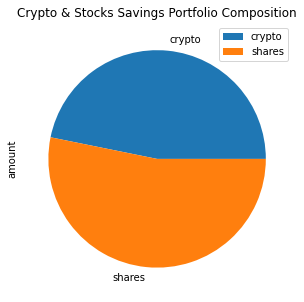

In [14]:
# Plot savings pie chart
df_savings.plot.pie(figsize = (10,5),y="amount", title="Crypto & Stocks Savings Portfolio Composition")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = share_val + crypto_val

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations, you are a baller! Your emergency fund is ${emergency_fund:,.0f} while your portfolio value is ${crypto_val + share_val :,.2f}")
if total_savings == emergency_fund:
    print("Congratulations, you scored your financial goal! Keep up the good work")
if total_savings < emergency_fund:
    funds_needed = emergency_fund - total_savings
    print(f"Warning, you need another {funds_needed} to go before you can rest easy")

Congratulations, you are a baller! Your emergency fund is $36,000 while your portfolio value is $77,185.07


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
#Gather 5 years of historical price data (+50 days for Alpacca Allowable Call Dates) 
starting_date = str(date.today() - timedelta(days=1873))

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp(starting_date, tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()


# Get 5 year's worth of historical price data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.sample(2)

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2017-09-14 04:00:00+00:00  249.83  250.3200  249.6000  250.09   95446349   
2017-11-20 05:00:00+00:00  258.15  258.5250  257.8600  258.30   48090401   
2019-06-07 04:00:00+00:00  285.95  288.8500  285.7400  287.65   74283295   
2018-07-10 04:00:00+00:00  278.40  279.0100  278.0800  278.90   52147083   
2021-11-08 05:00:00+00:00  469.65  470.2300  468.2031  468.93   50441861   
2020-06-12 04:00:00+00:00  308.32  309.0800  298.6000  304.21  194681379   
2018-09-21 04:00:00+00:00  293.17  293.2200  291.8100  291.99  107509570   
2017-12-11 05:00:00+00:00  265.60  266.3800  265.4793  266.31   83144290   
2021-05-10 04:00:00+00:00  422.55  422.7400  417.8100  417.94   81184758   
2021-07-20 04:00:00+00:00  425.73  432.4200  424.8300  431.06   99175950   
2018-05-02 04:00:00+00:00  264.77  265.6800  262.7600  263.20   86373743   
2021-02-16 05:00:00+00:00  394.06  394.1700  391.5300  392.30   50973094   
2020-10-12 04:00:00+00:00  349.55  354.0200  349.0600  352.43   80468462   
2018-03-08 05:00:00+00:00  273.52  274.2400  272.4200  274.10   66901150   
2020-08-06 04:00:00+00:00  331.52  334.4600  331.1300  334.33   43745653   
2021-04-20 04:00:00+00:00  413.93  415.0859  410.5900  412.17   79104051   
2021-02-24 05:00:00+00:00  386.23  392.2300  385.2700  391.77   72434520   
2021-11-15 05:00:00+00:00  468.66  468.8100  466.2300  467.43   46854294   
2021-04-09 04:00:00+00:00  408.44  411.6700  408.2600  411.49   60587699   
2018-06-15 04:00:00+00:00  276.65  277.5100  275.3500  277.13  120673012   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2017-09-14 04:00:00+00:00      188794  250.052841  109.81  109.970  109.8100   
2017-11-20 05:00:00+00:00      155464  258.209900  109.23  109.300  109.1800   
2019-06-07 04:00:00+00:00      337830  287.477283  110.64  110.670  110.4500   
2018-07-10 04:00:00+00:00      207663  278.580198  106.28  106.300  106.1900   
2021-11-08 05:00:00+00:00      354068  468.987551  115.14  115.150  114.9500   
2020-06-12 04:00:00+00:00     1164188  303.422848  117.60  117.700  117.4400   
2018-09-21 04:00:00+00:00      258392  292.546686  105.34  105.470  105.3232   
2017-12-11 05:00:00+00:00      177382  265.948509  109.29  109.320  109.1300   
2021-05-10 04:00:00+00:00      495534  420.430646  114.61  114.720  114.4000   
2021-07-20 04:00:00+00:00      587415  429.641028  116.78  116.820  116.3200   
2018-05-02 04:00:00+00:00      300565  264.118423  105.70  105.780  105.6200   
2021-02-16 05:00:00+00:00      321226  392.877431  116.22  116.230  116.0200   
2020-10-12 04:00:00+00:00      369354  351.507741  117.85  117.950  117.7700   
2018-03-08 05:00:00+00:00      259822  273.471844  106.42  106.630  106.4200   
2020-08-06 04:00:00+00:00      290039  332.937218  119.62  119.730  119.5300   
2021-04-20 04:00:00+00:00      476871  412.677447  114.42  114.670  114.3900   
2021-02-24 05:00:00+00:00      459124  389.486751  115.07  115.500  115.0100   
2021-11-15 05:00:00+00:00      371884  467.374137  114.30  114.310  113.9000   
2021-04-09 04:00:00+00:00      329556  409.815634  114.11  114.330  114.0350   
2018-06-15 04:00:00+00:00      305807  276.757012  106.01  106.089  105.8600   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-09-14 04:00:00+00:00  109.93  1704216        7111  109.914840  
2017-11-20 05:00:00+00:00  109.25  2639133       10540  109.233763  
2019-06-07 04:00:00+00:00  110.53  3697054       12233  110.530069  
2018-07-10 04:00:00+00:00 

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-06-05 04:00:00+00:00  244.02  244.30  243.76  243.99   44698825   
2017-06-06 04:00:00+00:00  243.34  243.98  243.12  243.21   50375430   
2017-06-07 04:00:00+00:00  243.61  243.92  242.83  243.66   54144311   
2017-06-08 04:00:00+00:00  243.80  244.33  243.17  243.78   65950691   
2017-06-09 04:00:00+00:00  244.07  245.01  241.95  243.41  132256362   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-05 04:00:00+00:00      136071  244.029429          NaN  109.66   
2017-06-06 04:00:00+00:00      160561  243.517742    -0.003197  109.87   
2017-06-07 04:00:00+00:00      182098  243.535814     0.001850  109.81   
2017-06-08 04:00:00+00:00      210451  243.697117     0.000492  109.70   
2017-06-09 04:00:00+00:00      430463  243.643527    -0.001518  109.51   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-06-05 04:00:00+00:00  109.74  109.6000  109.67  2450624        9907   
2017-06-06 04:00:00+00:00  109.95  109.8100  109.89  1607846        8264   
2017-06-07 04:00:00+00:00  109.87  109.7000  109.76  1903624        9268   
2017-06-08 04:00:00+00:00  109.70  109.5101  109.65  1532737        8301   
2017-06-09 04:00:00+00:00  109.63  109.4600  109.56  1616833        8395   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-05 04:00:00+00:00  109.693010          NaN  
2017-06-06 04:00:00+00:00  109.897602     0.002006  
2017-06-07 04:00:00+00:00  109.768804    -0.001183  
2017-06-08 04:00:00+00:00  109.622036    -0.001002  
2017-06-09 04:00:00+00:00  109.536583    -0.000821

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997945,1.006742,0.997859,0.992739,0.998344,0.988932,1.004242,1.003402,0.997737,1.004899,...,0.996281,1.001597,0.998097,1.000353,1.000679,0.988667,1.007597,0.983838,0.993980,1.002434
2,0.999474,1.006717,0.996741,0.997846,1.001631,0.996012,1.009787,1.007318,0.998550,1.002642,...,0.998538,0.999903,0.995336,1.002421,1.001874,0.994716,1.011209,0.975151,0.995015,1.002055
3,0.997647,1.007114,0.996252,0.999890,1.011087,1.001133,1.013035,1.011778,0.995271,1.000955,...,0.996323,0.993233,0.989145,0.993642,0.993637,0.996554,1.004691,0.979648,1.001693,0.997688
4,0.999018,1.020337,0.995658,1.015928,1.010612,0.995828,1.018055,1.003741,0.999099,1.005363,...,1.002521,0.989279,0.989948,0.990804,0.999062,0.990902,1.006684,0.985123,0.994834,0.996324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.172038,4.755186,4.435244,4.911737,6.267514,5.142647,4.214707,4.666518,2.865839,3.214053,...,1.998219,1.848693,2.261364,2.675448,2.142082,2.191116,2.563158,2.220745,1.822613,3.025977
7557,4.155607,4.788369,4.412238,4.941822,6.233502,5.104302,4.243939,4.631492,2.861688,3.200346,...,2.008169,1.842968,2.269196,2.664262,2.137644,2.194561,2.557108,2.214824,1.832198,3.027634
7558,4.149276,4.736395,4.427880,4.922206,6.237262,5.033486,4.277874,4.658719,2.892239,3.204147,...,2.012498,1.846189,2.246762,2.662123,2.148653,2.206760,2.556924,2.231375,1.852423,3.012545
7559,4.119715,4.764918,4.458682,4.931553,6.264656,5.026165,4.320241,4.647549,2.896992,3.187007,...,2.003271,1.835950,2.232405,2.674728,2.149612,2.233965,2.566932,2.238558,1.846201,3.023808


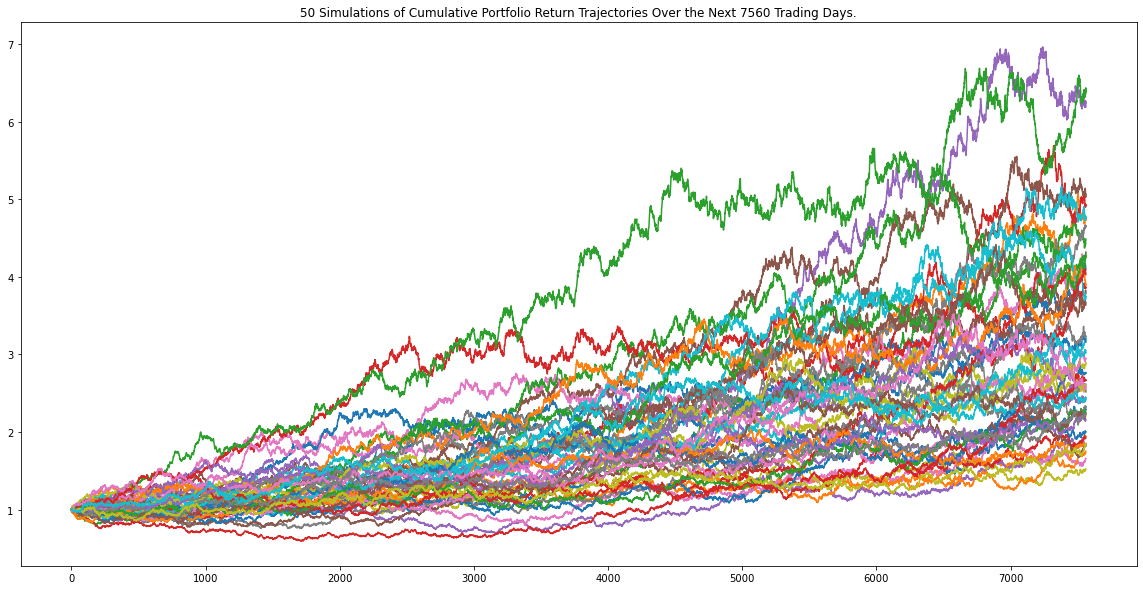

In [20]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

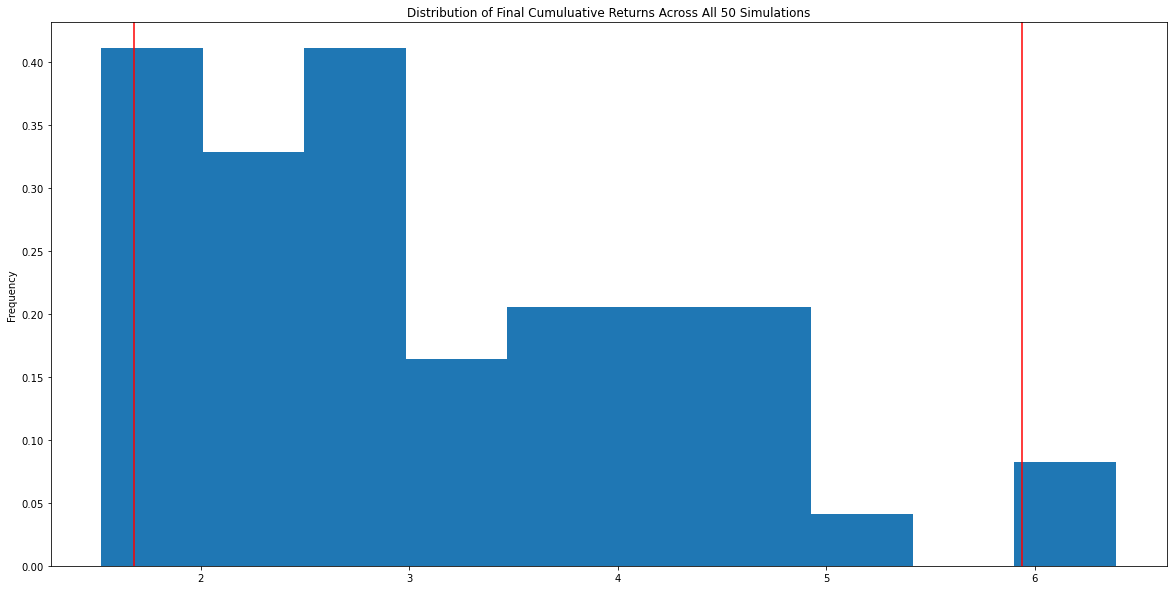

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           50.000000
mean             3.138236
std              1.193975
min              1.523164
25%              2.243466
50%              2.712276
75%              3.997104
max              6.389638
95% CI Lower     1.679782
95% CI Upper     5.939066
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $33595.63 and $118781.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $50393.45 and $178171.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option with higher risk and initial investment

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-06-05 04:00:00+00:00  244.02  244.30  243.76  243.99   44698825   
2017-06-06 04:00:00+00:00  243.34  243.98  243.12  243.21   50375430   
2017-06-07 04:00:00+00:00  243.61  243.92  242.83  243.66   54144311   
2017-06-08 04:00:00+00:00  243.80  244.33  243.17  243.78   65950691   
2017-06-09 04:00:00+00:00  244.07  245.01  241.95  243.41  132256362   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-05 04:00:00+00:00      136071  244.029429          NaN  109.66   
2017-06-06 04:00:00+00:00      160561  243.517742    -0.003197  109.87   
2017-06-07 04:00:00+00:00      182098  243.535814     0.001850  109.81   
2017-06-08 04:00:00+00:00      210451  243.697117     0.000492  109.70   
2017-06-09 04:00:00+00:00      430463  243.643527    -0.001518  109.51   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-06-05 04:00:00+00:00  109.74  109.6000  109.67  2450624        9907   
2017-06-06 04:00:00+00:00  109.95  109.8100  109.89  1607846        8264   
2017-06-07 04:00:00+00:00  109.87  109.7000  109.76  1903624        9268   
2017-06-08 04:00:00+00:00  109.70  109.5101  109.65  1532737        8301   
2017-06-09 04:00:00+00:00  109.63  109.4600  109.56  1616833        8395   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-05 04:00:00+00:00  109.693010          NaN  
2017-06-06 04:00:00+00:00  109.897602     0.002006  
2017-06-07 04:00:00+00:00  109.768804    -0.001183  
2017-06-08 04:00:00+00:00  109.622036    -0.001002  
2017-06-09 04:00:00+00:00  109.536583    -0.000821

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998587,1.005422,0.996778,0.994993,0.996206,1.001492,0.986452,0.998104,1.000148,0.999155,...,1.009527,1.002142,1.005796,0.998240,0.998893,0.998757,1.012507,1.003150,0.994693,1.009104
2,0.998874,1.001871,1.002748,0.995931,0.992721,1.010612,0.987612,0.995831,1.002208,1.005705,...,1.019568,0.998127,1.007282,0.999013,0.999922,0.993347,1.008713,1.011112,0.993106,1.006340
3,0.992158,0.999953,1.001185,0.990418,0.990434,1.015235,0.994375,0.993244,0.998649,1.003774,...,1.016988,0.997714,1.005583,1.008410,1.005214,0.987513,1.010779,1.009190,0.990120,1.005242
4,0.988187,0.998570,1.004776,0.991669,0.984226,1.007086,0.992908,0.987974,0.996592,1.006096,...,1.017083,0.995354,1.013511,1.007495,1.016551,1.003891,1.014201,1.002186,0.990585,0.999359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.284293,6.139888,7.792684,2.465219,1.480806,4.317903,2.368406,4.577396,5.330208,3.762673,...,4.134154,3.463097,5.429805,4.044821,7.987971,3.108278,3.824982,3.648959,3.078058,2.169700
7557,3.284898,6.141842,7.746145,2.463933,1.473637,4.294082,2.379405,4.577474,5.292344,3.771657,...,4.104874,3.469612,5.419506,4.038584,8.009134,3.112770,3.835216,3.672164,3.098669,2.176309
7558,3.297329,6.139317,7.750451,2.485332,1.483766,4.305622,2.363757,4.619923,5.319821,3.823671,...,4.133283,3.494366,5.418858,4.038633,8.050901,3.106704,3.879733,3.673871,3.126025,2.197822
7559,3.292246,6.138946,7.786064,2.482548,1.473170,4.335155,2.357421,4.627967,5.296717,3.866077,...,4.120922,3.492934,5.389360,4.048203,8.118381,3.092402,3.859800,3.685733,3.144570,2.216467


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


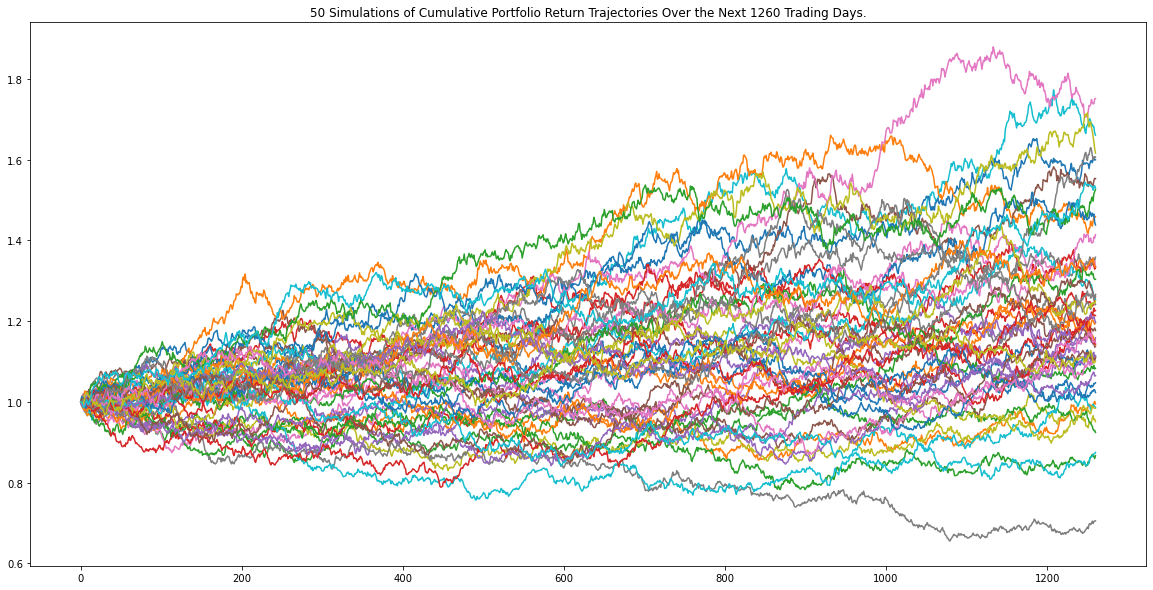

In [27]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

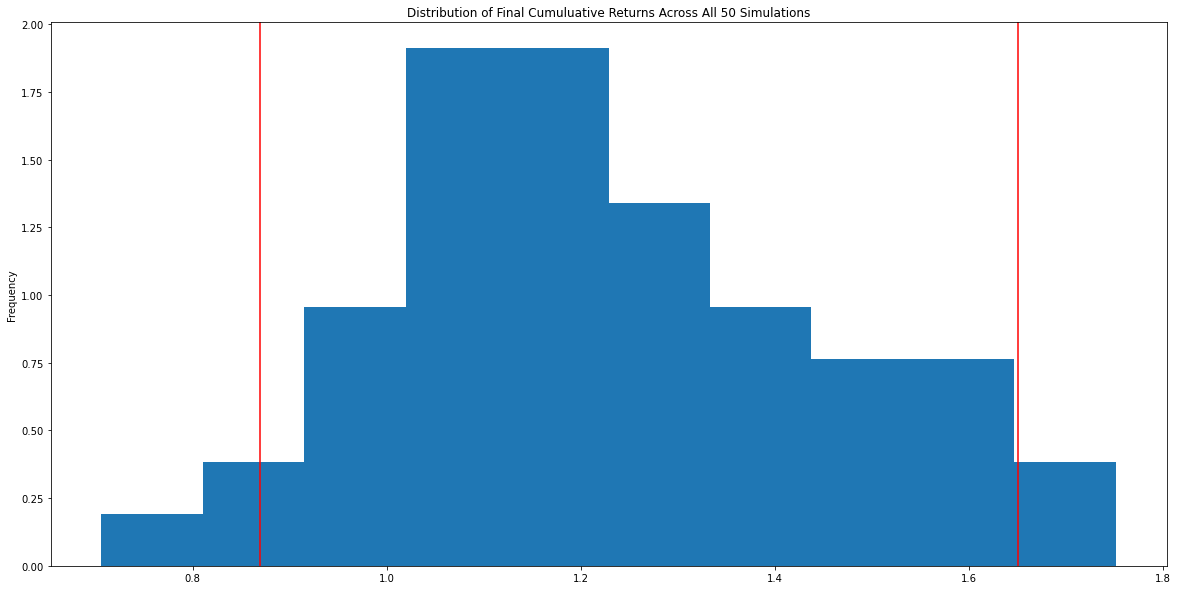

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()


In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           50.000000
mean             1.225421
std              0.225268
min              0.705603
25%              1.103654
50%              1.196976
75%              1.334922
max              1.751524
95% CI Lower     0.868762
95% CI Upper     1.650875
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52125.73 and $99052.49


### Ten Years Retirement Option with high risk and 20K initial investment

In [31]:
def retirement_option(years,num_simulations,initial_investment,risk):


    # Configuring a Monte Carlo simulation to forecast x years cumulative returns
    MC_ = MCSimulation(
        portfolio_data = df_stock_data,
        weights = risk,
        num_simulation = num_simulations,
        num_trading_days = 252*years)

    # Running a Monte Carlo simulation
    MC_.calc_cumulative_return()

    # Plot probability distribution and confidence intervals
    dist_plot = MC_.plot_distribution()

    # Plot simulation outcomes
    line_plot = MC_.plot_simulation()

    # Fetch summary statistics from the Monte Carlo simulation results
    tbl = MC_.summarize_cumulative_return()

    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
    ci_lower_five = round(tbl[8]*initial_investment,2)
    ci_upper_five = round(tbl[9]*initial_investment,2)

    # Print results
    print("\n")
    print("  ------  Results  ----------  \n\n")
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
        f" over the next 5 years will end within in the range of"
        f" ${ci_lower_five} and ${ci_upper_five}\n")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


  ------  Results  ----------  


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $20654.96 and $62039.71



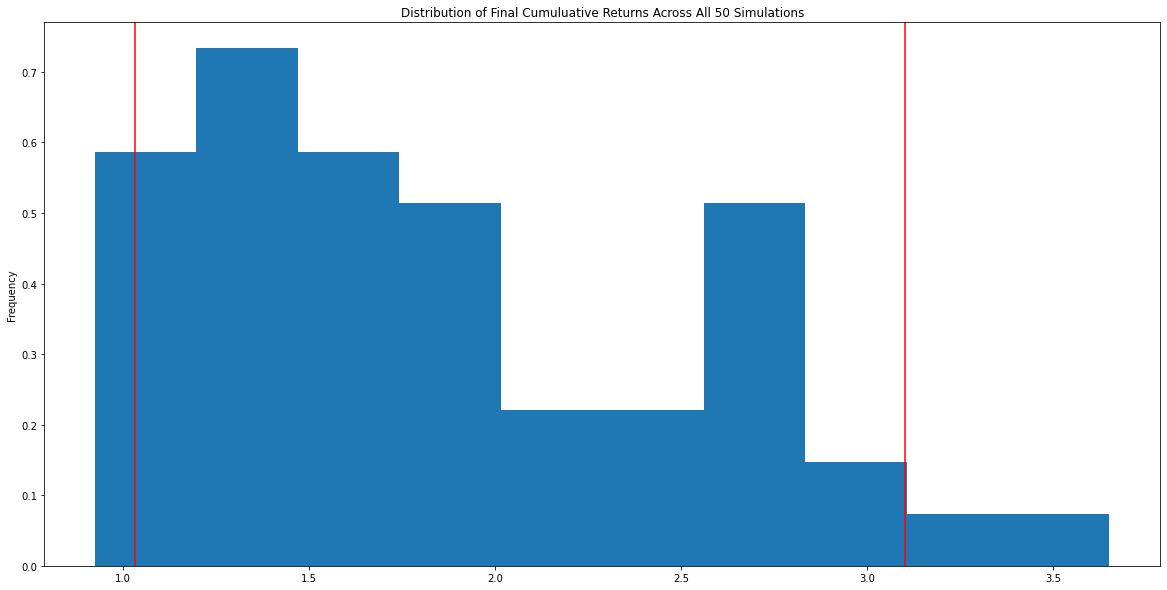

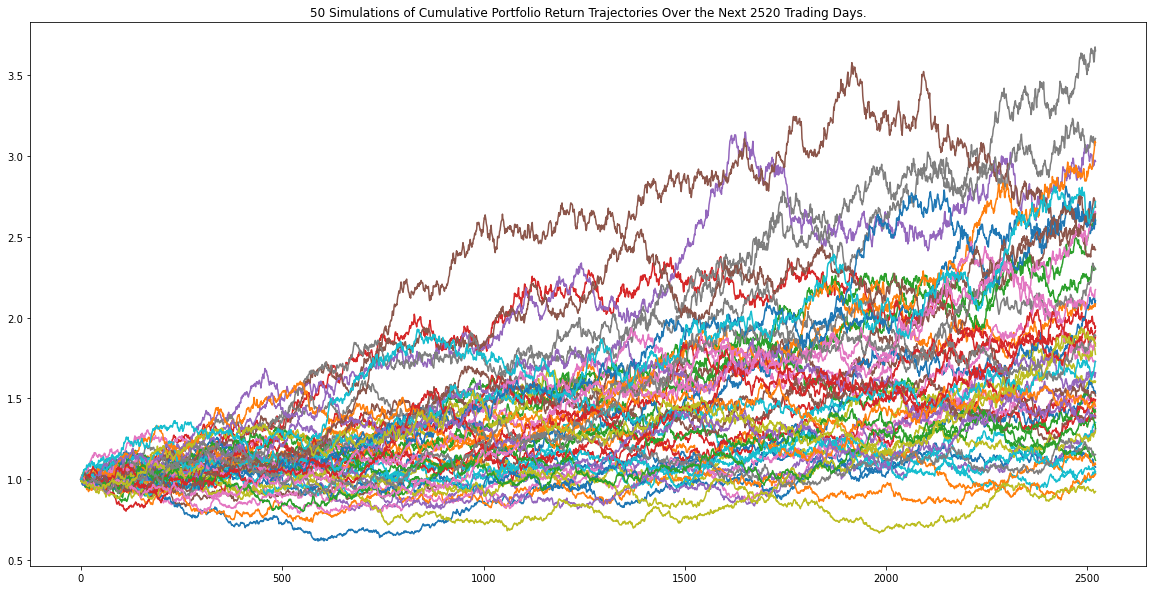

In [32]:
retirement_option(years=10,num_simulations=500,initial_investment = 20000,risk = [.60,.40])